In [1]:
import pandas as pd

In [2]:
city = pd.read_csv("us-state-capitals.csv")
city

,name,description,latitude,longitude
0,Alabama,Montgomery,32.377716,-86.300568
1,Alaska,Juneau,58.301598,-134.420212
2,Arizona,Phoenix,33.448143,-112.096962
3,Arkansas,Little Rock,34.746613,-92.288986
4,California,Sacramento,38.576668,-121.493629
5,Colorado,Denver,39.739227,-104.984856
6,Connecticut,Hartford<br>,41.764046,-72.682198
7,Delaware,Dover,39.157307,-75.519722
8,Hawaii,Honolulu,21.307442,-157.857376
9,Florida,Tallahassee,30.438118,-84.281296


In [3]:
city = city.drop("description",axis = 1)
new_row = {
    'name': 'Washington D.C',
    'latitude':38.907,
    'longitude': -77.0369
}
new_row_df = pd.DataFrame(new_row, index = [0])
city = pd.concat([city, new_row_df], ignore_index=True)
city

,name,latitude,longitude
0,Alabama,32.377716,-86.300568
1,Alaska,58.301598,-134.420212
2,Arizona,33.448143,-112.096962
3,Arkansas,34.746613,-92.288986
4,California,38.576668,-121.493629
5,Colorado,39.739227,-104.984856
6,Connecticut,41.764046,-72.682198
7,Delaware,39.157307,-75.519722
8,Hawaii,21.307442,-157.857376
9,Florida,30.438118,-84.281296


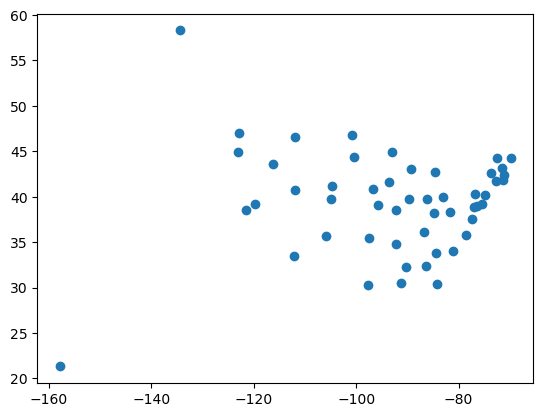

In [4]:
import matplotlib.pyplot as plt
plt.scatter(city['longitude'], city['latitude'])

In [5]:
#Use K-means to 
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, init='k-means++',random_state=1)
label = kmeans.fit_predict(city[['longitude','latitude']])
city['group'] = label

/Users/feierx/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [6]:
centroid = pd.DataFrame(kmeans.cluster_centers_, columns = ['centroid_lon','centroid_lat'])
group = [0,1,2,3,4,5,6,7,8,9]
centroid['group'] = group

#join the fitted centroid to the original dataset

city = pd.merge(city,centroid, on = "group", how = "left")

In [7]:
city

,name,latitude,longitude,group,centroid_lon,centroid_lat
0,Alabama,32.377716,-86.300568,9,-83.523126,33.780290
1,Alaska,58.301598,-134.420212,5,-134.420212,58.301598
2,Arizona,33.448143,-112.096962,1,-107.946004,38.157469
3,Arkansas,34.746613,-92.288986,7,-93.780435,32.654881
4,California,38.576668,-121.493629,6,-119.235551,43.319722
5,Colorado,39.739227,-104.984856,1,-107.946004,38.157469
6,Connecticut,41.764046,-72.682198,4,-71.831279,42.911781
7,Delaware,39.157307,-75.519722,8,-76.681973,38.692476
8,Hawaii,21.307442,-157.857376,2,-157.857376,21.307442
9,Florida,30.438118,-84.281296,9,-83.523126,33.780290


In [8]:
import folium
map = folium.Map(location=[city['latitude'].mean(), city['longitude'].mean()], zoom_start=4)

# Define a color palette for 10 groups
colors = ['red', 'blue', 'green', 'purple', 'orange', 'darkred', 'lightblue', 'pink', 'gray', 'black']

# Add markers to the map
for _, row in city.iterrows():
    color = colors[row['group']]
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        color=color,
        fill=True,
        fill_color=color,
        popup=f"{row['name']} (Group {row['group']})"
    ).add_to(map)

# Display the map
map

## Function

In [9]:
import numpy as np
from itertools import permutations

def all_possible_paths(dist_matrix, start, end):
    n = len(dist_matrix)
    intermediate_points = list(range(n))
    intermediate_points.remove(start)
    intermediate_points.remove(end)

    shortest_path = None
    shortest_distance = float('inf')

    for path in permutations(intermediate_points):
        current_path = [start] + list(path) + [end]
        current_distance = sum(dist_matrix[current_path[i], current_path[i + 1]]\
                               for i in range(len(current_path) - 1))

        if current_distance < shortest_distance:
            shortest_distance = current_distance
            shortest_path = current_path

    return shortest_distance, shortest_path

In [10]:
def end_point(current_num, next_num):
    dis = []
    for i in range(len(df_dict['group_'+str(current_num)])):
        cent_coor = (city[city['group'] == next_num]['centroid_lat'].iloc[0], \
                     city[city['group'] == next_num]['centroid_lon'].iloc[0])
        coord2 = (df_dict['group_'+str(current_num)].iloc[i]['latitude'],\
                  df_dict['group_'+str(current_num)].iloc[i]['longitude'])
        dis.append(round(great_circle(coord1, coord2).miles,3))
    return np.argmin(dis)

In [11]:
def dis_matrix (df):
    matrix = np.zeros((len(df), len(df)))
    for i in range(len(df)):
        for j in range(len(df)):
            if i != j:
                coord1 = (df.iloc[i]['latitude'], df.iloc[i]['longitude'])
                coord2 = (df.iloc[j]['latitude'], df.iloc[j]['longitude'])
                matrix[i, j] = round(great_circle(coord1, coord2).miles,3)
    return matrix

## Group routine

In [12]:
import numpy as np
from geopy.distance import great_circle
group_dis = np.zeros((len(centroid), len(centroid)))

# Calculate the distances of group
for i in range(len(centroid)):
    for j in range(len(centroid)):
        if i != j:
            coord1 = (centroid.iloc[i]['centroid_lat'], centroid.iloc[i]['centroid_lon'])
            coord2 = (centroid.iloc[j]['centroid_lat'], centroid.iloc[j]['centroid_lon'])
            group_dis[i, j] = round(great_circle(coord1, coord2).miles,3)

In [13]:
group_dis

array([[   0.   , 1162.713, 4326.976,  530.489,  777.961, 2443.268,
        1703.029,  652.039,  523.534,  454.222],
       [1162.713,    0.   , 3169.515,  688.891, 1909.627, 1825.929,
         689.411,  882.393, 1684.442, 1394.446],
       [4326.976, 3169.515,    0.   , 3816.684, 5034.189, 2811.041,
        2683.869, 3965.017, 4850.466, 4541.085],
       [ 530.489,  688.891, 3816.684,    0.   , 1228.242, 1980.909,
        1173.16 ,  678.584, 1045.548,  899.54 ],
       [ 777.961, 1909.627, 5034.189, 1228.242,    0.   , 2822.179,
        2358.144, 1386.141,  386.316,  892.459],
       [2443.268, 1825.929, 2811.041, 1980.909, 2822.179,    0.   ,
        1222.961, 2581.691, 2856.33 , 2869.945],
       [1703.029,  689.411, 2683.869, 1173.16 , 2358.144, 1222.961,
           0.   , 1560.971, 2217.36 , 2021.273],
       [ 652.039,  882.393, 3965.017,  678.584, 1386.141, 2581.691,
        1560.971,    0.   , 1044.292,  597.726],
       [ 523.534, 1684.442, 4850.466, 1045.548,  386.316, 2856.3

In [14]:
#identify the group number of start and end point
start_group = city[city['name'] == "Iowa"]['group'].values[0]
end_group = city[city['name'] =='Washington D.C']['group'].values[0]

# Calculate the shortest path
shortest_distance, group_path = all_possible_paths(group_dis, 3,8)
group_path

[3, 5, 2, 6, 1, 7, 9, 0, 4, 8]

## Within Group

In [15]:
#initial setup of the final answer variables
miles = 0
path = []

# generate a dictionary for multiple group dataframe, key is the group number, value is the df of the group
df_dict = {}
for group in range(0,10):
    filtered_df = city[city['group'] == group]
    df_dict[f'group_{group}'] = filtered_df.reset_index(drop = True)

In [16]:
#first group

#find out the first destination
end_0 = end_point(group_path[0],group_path[1])

#starting group
start_group = 'group_'+str(group_path[0])

#start point indext
start = df_dict[start_group][df_dict[start_group]['name'] == 'Iowa'].index[0]

#distance matrix of the first group
group0_dis = dis_matrix(df_dict[start_group])

#find the shortest path within the first group
shortest_distance, shortest_path = all_possible_paths(group0_dis, start, end_0)
miles += shortest_distance
path += df_dict['group_'+str(group_path[0])].iloc[shortest_path]['name'].tolist()

In [17]:
#list for the ending point index
end = []
end.append(end_0)

for i in range(1,10):
    cur_group = group_path[i]
    pre_group = group_path[i-1]
    
    if i == 9:
        end.append(df_dict['group_'+str(cur_group)][df_dict['group_'+str(cur_group)]['name'] == 'Washington D.C'].index[0] +1)
    else:
        next_group = group_path[i+1]
        #find out the end point and append to the list
        end.append(end_point(cur_group,next_group) +1)
    
    #concat the previous group end point as the start point
    df_dict['group_'+str(cur_group)] = pd.concat([df_dict['group_'+str(pre_group)].loc[[end[i-1]]], df_dict['group_'+str(cur_group)]], ignore_index=True)

    #calculate the distance matrix within this group
    dis_mat = dis_matrix(df_dict['group_'+str(cur_group)])
    
    #find out the shortest path
    shortest_distance, shortest_path = all_possible_paths(dis_mat,0,end[i])
    
    #store the shortest path to the answer variable
    miles += shortest_distance
    path += df_dict['group_'+str(cur_group)].iloc[shortest_path[1:]]['name'].tolist()

In [18]:
miles

19133.775

In [21]:
print(', '.join(path))

Iowa, Minnesota, North Dakota, South Dakota, Nebraska, Kansas, Missouri, Alaska, Hawaii, California, Nevada, Oregon, Washington, Idaho, Montana, Utah, Arizona, New Mexico, Wyoming, Colorado, Oklahoma, Texas, Arkansas, Louisiana, Mississippi, Alabama, Florida, South Carolina, West Virginia, Georgia, Kentucky, Indiana, Ohio, Michigan, Wisconsin, Illinois, Tennessee, New York, Vermont, Maine, New Hampshire, Massachusetts, Rhode Island, Connecticut, New Jersey, Pennsylvania, Delaware, Maryland, Virginia, North Carolina, Washington D.C
